<a href="https://colab.research.google.com/github/Raushan787/Decline-Curve/blob/main/Decline_curve_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [138]:
# Lets assume required data
t=np.arange(1,1000)   #day
q_i=5000 #bbl/days
d=.005 # per day


Exponential Decline

In [139]:
#Calculation of flowrate for exponential Decline
b=0
q_e=q_i*np.exp(-d*t)

#Cumulative production
q_e_cum=(q_i-q_e)/d

In [140]:
#Creating dataframe
df=pd.DataFrame({"time":t,"q":q_e,"q_cum":q_e_cum})
df.head()

,time,q,q_cum
0,1,4975.062396,4987.520807
1,2,4950.249169,9950.166251
2,3,4925.559698,14888.060397
3,4,4900.993367,19801.326693
4,5,4876.549560,24690.087972


In [141]:
#Plot
fig=px.line(data_frame=df,x="time",y=df["q"],title="Flowrate vs Time")
fig.update_layout(
    width=800,
    height=500,
xaxis_title="Time (day)",
yaxis_title="Flowrate (bbl/day)",
template="plotly_dark")
fig.update_traces(line=dict(width=7,color='red'))
fig.show()

Harmonic Decline

In [152]:
#Calculating the flowrate for harmonic decline
b=1
q_h=q_i/(1+d*t)

#Cumulative production
q_h_cum=np.log(q_i/q_h)*q_i/d

In [153]:
#Creating datframe
df=pd.DataFrame({"time":t,"q":q_h,"q_cum":q_h_cum})
df.head()

,time,q,q_cum
0,1,4975.124378,4987.541511
1,2,4950.495050,9950.330853
2,3,4926.108374,14888.612494
3,4,4901.960784,19802.627296
4,5,4878.048780,24692.612590


In [154]:
#Plotting the data

fig=px.line(data_frame=df,x="time",y=df["q"],title="Flowrate vs Year")
fig.update_layout(
xaxis_title="Time (day)",
yaxis_title="Flowrate (bbl/day)",
template="plotly_white")
fig.update_traces(line=dict(width=5,color='green'))
fig.show()

Hyperbolic Decline

0<b<1

In [155]:
#Take b as 0.5
b=0.4

In [156]:
#Calculating flow rate for hyperbolic decline
q_hyp=q_i/np.power((b*d*t+1),(1/b))
q_hyp_cum=(q_i**b)*(q_hyp**(1-b)-q_i**(1-b))/((b-1)*d)

In [157]:
#Creating Dataframe
df=pd.DataFrame({"t":t,"q":q_hyp,"q_cum":q_hyp_cum})
df.head()

,t,q,q_cum
0,1,4975.087238,4987.529101
1,2,4950.347911,9950.232288
2,3,4925.780471,14888.282219
3,4,4901.383383,19801.850013
4,5,4877.155133,24691.105264


In [158]:

#Plotting the data
fig=px.line(data_frame=df,x="t",y=df["q"],title="Flowrate vs Year")
fig.update_layout(
xaxis_title="Time (day)",
yaxis_title="Flowrate (bbl/day)",
template="seaborn")
fig.update_traces(line=dict(width=5,color='blue'))
fig.show()

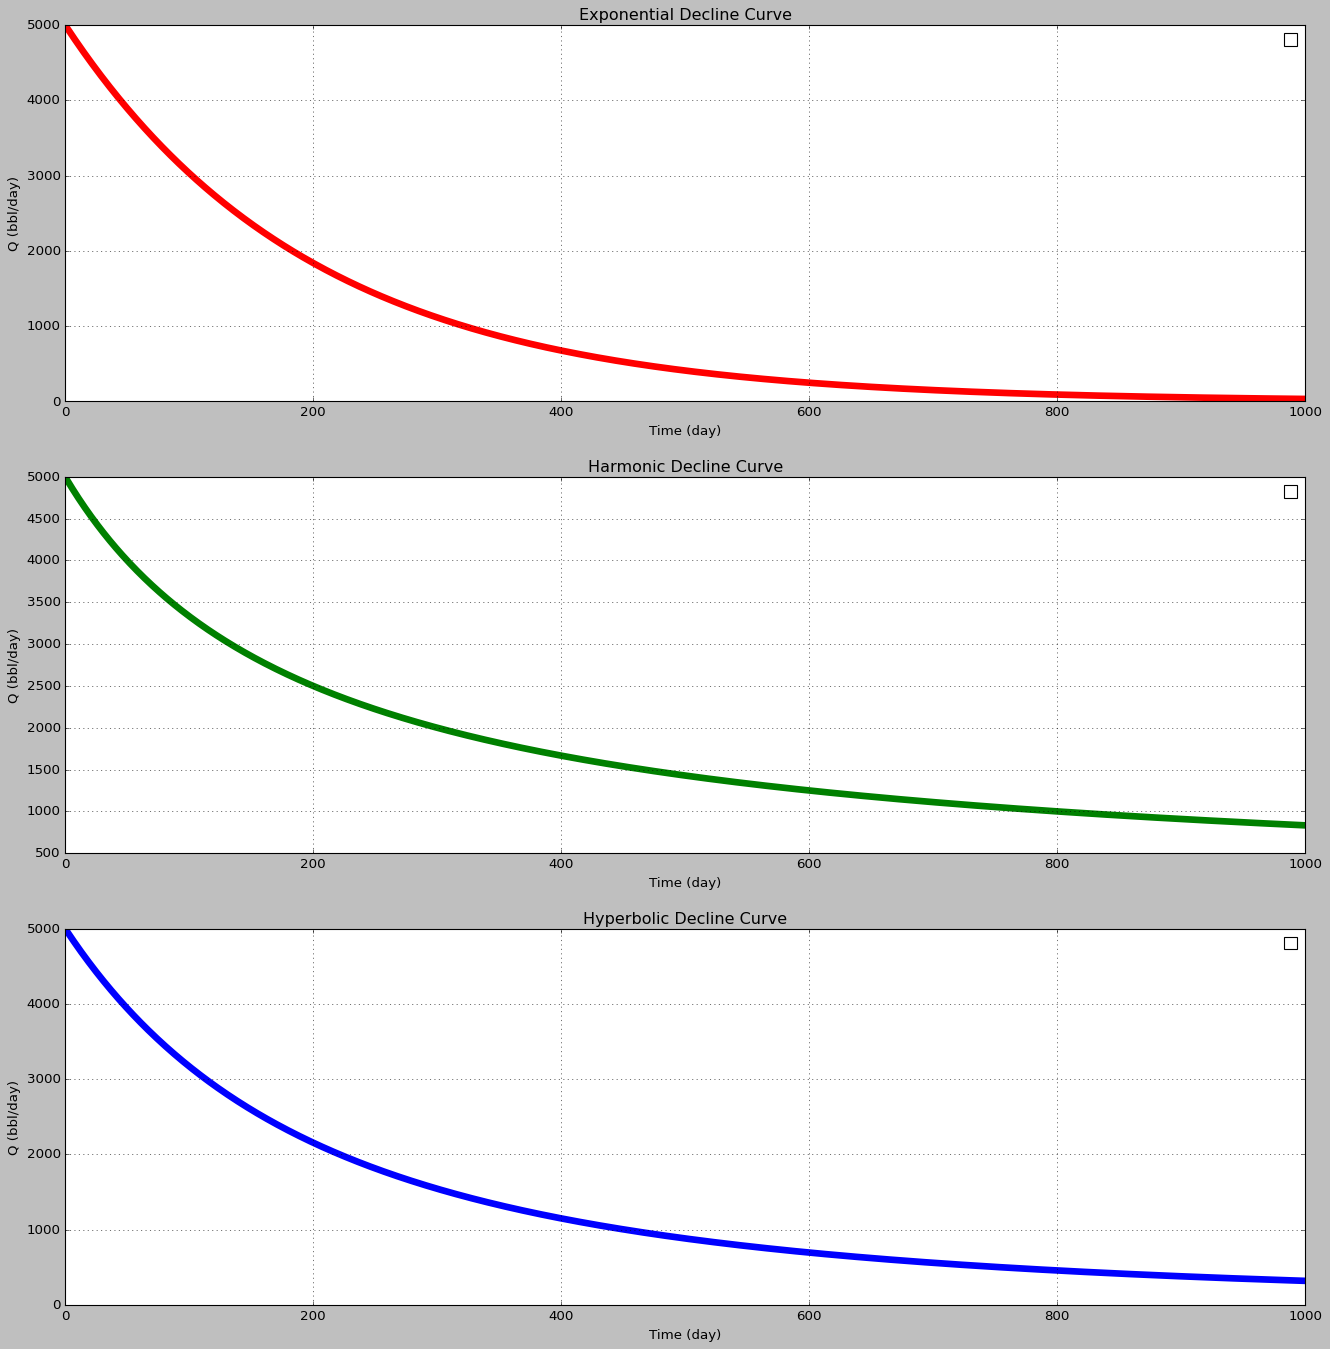

In [159]:
#Plotting data
plt.style.use("classic")
fig,ax=plt.subplots(nrows=3,ncols=1)
fig.set_figwidth(20)
fig.set_figheight(20)

#First Curve--> Exponential Curve
ax[0].plot(t,q_e,color="red",lw=6)
ax[0].set_title("Exponential Decline Curve")
ax[0].set_xlabel("Time (day)")
ax[0].set_ylabel("Q (bbl/day)")
ax[0].grid()
ax[0].legend()


#Second Curve-->Harmonic Curve
ax[1].plot(t,q_h,color="green",lw=6)
ax[1].set_title("Harmonic Decline Curve")
ax[1].set_xlabel("Time (day)")
ax[1].set_ylabel("Q (bbl/day)")
ax[1].grid()
ax[1].legend()


#Third Curve-->Hyperbolic Curve
ax[2].plot(t,q_hyp,color="blue",lw=6)
ax[2].set_title("Hyperbolic Decline Curve")
ax[2].set_xlabel("Time (day)")
ax[2].set_ylabel("Q (bbl/day)")
ax[2].grid()
ax[2].legend()

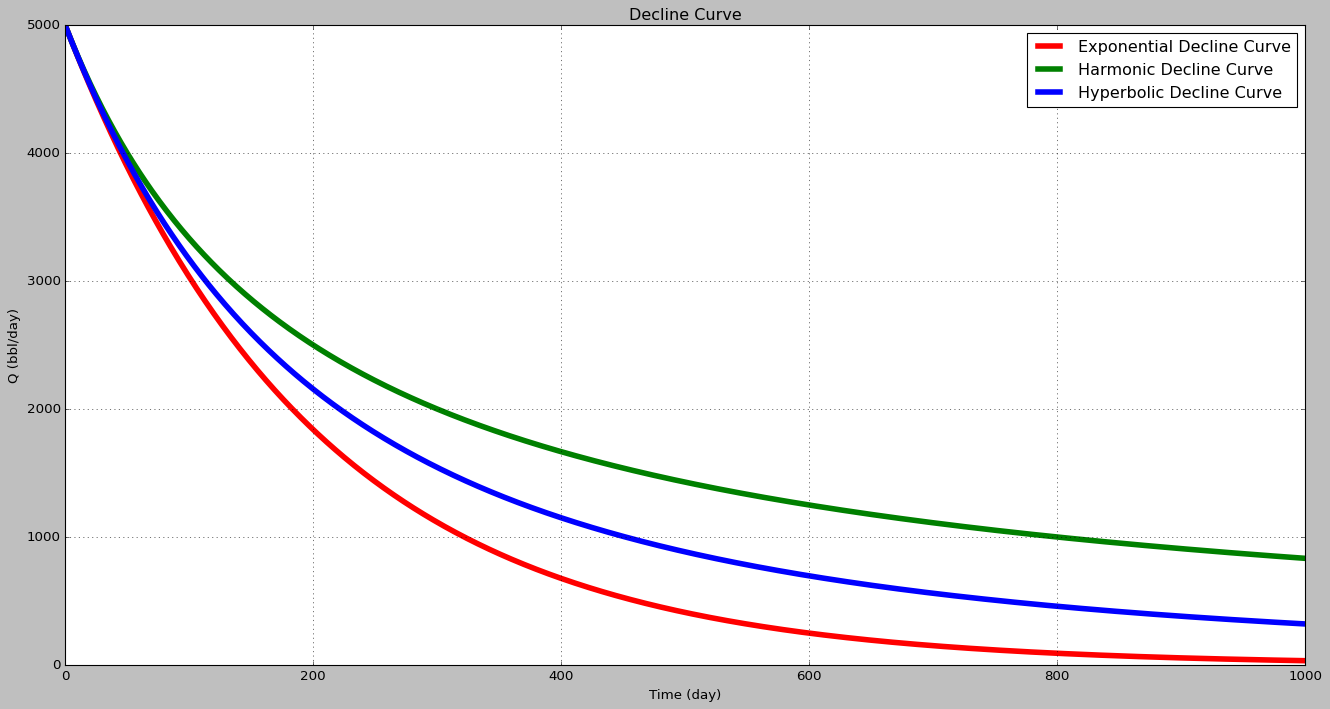

In [160]:
#Plot on same graph
plt.style.use("classic")
plt.figure(figsize=(20,10))
plt.plot(t,q_e,color="red",label="Exponential Decline Curve",lw=5)
plt.plot(t,q_h,color="green",label="Harmonic Decline Curve",lw=5)
plt.plot(t,q_hyp,"b",label="Hyperbolic Decline Curve",lw=5)
plt.title("Decline Curve")
plt.xlabel("Time (day)")
plt.ylabel("Q (bbl/day)")
plt.legend()
plt.grid()
plt.legend()

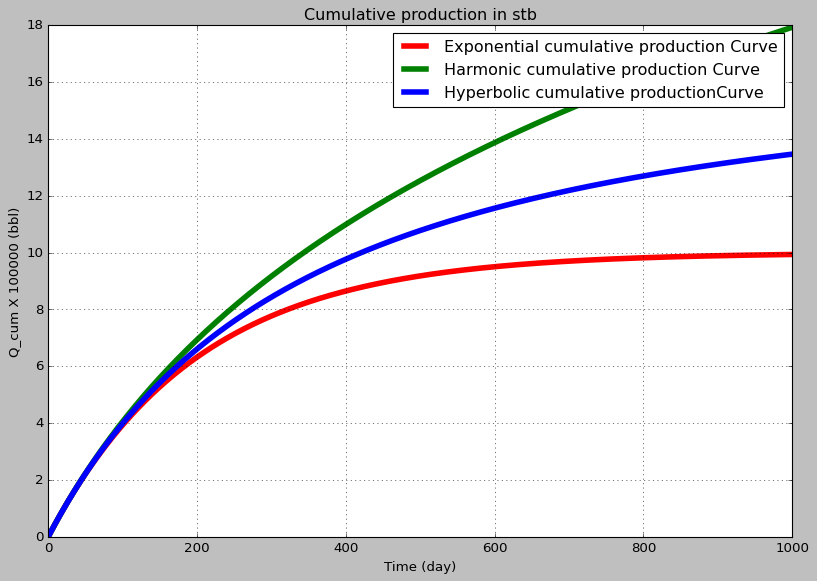

In [161]:
#Cumulative production curve
plt.style.use("classic")
plt.figure(figsize=(12,8))
plt.plot(t,q_e_cum/100000,color="red",label="Exponential cumulative production Curve",lw=5)
plt.plot(t,q_h_cum/100000,color="green",label="Harmonic cumulative production Curve",lw=5)
plt.plot(t,q_hyp_cum/100000,"b",label="Hyperbolic cumulative productionCurve",lw=5)
plt.title("Cumulative production in stb")
plt.xlabel("Time (day)")
plt.ylabel("Q_cum X 100000 (bbl)")
plt.legend()
plt.grid()
plt.legend()